In [1]:
#разкомментировать при первом запуске
#!git clone https://github.com/TimmmofeyD/rzhd_hack.git
#%cd rzhd_hack/
#%ls
#!pip install -U torch torchvision
#!pip install -U opencv-python-headless
#!git clone https://github.com/ultralytics/yolov5
#%cd yolov5
#!pip install -r requirements.txt
#%cd ..
#%ls

In [2]:
#обучить тоже можно 1 раз
#!python /content/rzhd_hack/yolov5/train.py --img 640 --batch 16 --epochs 50 --data /content/rzhd_hack/data.yaml --weights yolov5s.pt

In [3]:
#запустить при первом запуске
#!sudo apt update
#!sudo apt install tesseract-ocr
#!sudo apt install libtesseract-dev
#!sudo apt-get install tesseract-ocr-rus
#!pip install pytesseract
#!pip install easyocr
#!pip install deeppavlov

In [4]:
import torch
from PIL import Image
import cv2
import pytesseract
import matplotlib.pyplot as plt
from IPython.display import display
import easyocr
import numpy as np
from deeppavlov import configs, build_model
from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline

In [23]:
model = torch.hub.load('/content/rzhd_hack/yolov5/', 'custom', path='/content/rzhd_hack/yolov5/runs/train/exp/weights/best.pt', source='local')

YOLOv5 🚀 v7.0-312-g1bcd17ee Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [30]:
img_path = '/content/rzhd_hack/images/train/title_11.png'

In [31]:
results = model(img_path)

In [32]:
results

YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 620x431 8 text_blocks
Speed: 19.0ms pre-process, 90.7ms inference, 2.3ms NMS per image at shape (1, 3, 640, 448)

In [33]:
detected_blocks = results.xyxy[0].cpu().numpy()

In [34]:
image = Image.open(img_path)

In [11]:
#!pip install git+https://github.com/kmkurn/pytorch-crf.git
#!pip install torchcrf
#!pip install --upgrade torch transformers deeppavlov

In [12]:
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

reader = easyocr.Reader(['ru'])

tokenizer = AutoTokenizer.from_pretrained("DeepPavlov/rubert-base-cased")
model = AutoModelForTokenClassification.from_pretrained("DeepPavlov/rubert-base-cased")
nlp = pipeline("ner", model=model, tokenizer=tokenizer)

Some weights of BertForTokenClassification were not initialized from the model checkpoint at DeepPavlov/rubert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


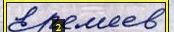

Detected text tesseract: [12 ве еее


Detected text easyOCR: ['2се 6']

NER results: [{'entity': 'LABEL_0', 'score': 0.57542574, 'index': 1, 'word': '[', 'start': 0, 'end': 1}, {'entity': 'LABEL_0', 'score': 0.5553281, 'index': 2, 'word': '12', 'start': 1, 'end': 3}, {'entity': 'LABEL_1', 'score': 0.59585387, 'index': 3, 'word': 'ве', 'start': 4, 'end': 6}, {'entity': 'LABEL_1', 'score': 0.52682084, 'index': 4, 'word': 'ее', 'start': 7, 'end': 9}, {'entity': 'LABEL_0', 'score': 0.5390721, 'index': 5, 'word': '##е', 'start': 9, 'end': 10}]
Entity: 6, Score: 0.6079244017601013
Entity: ##се, Score: 0.59617018699646
Entity: 2, Score: 0.5885908603668213


Detected text tesseract:  


Detected text easyOCR: ['7094е2', 'Йе22']

NER results: []
Entity: ##22, Score: 0.6422748565673828
Entity: ##4, Score: 0.6361569762229919
Entity: Й, Score: 0.621688187122345


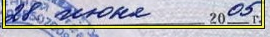

Detected text tesseract:  


Detected text easyOCR: ['222ю е', '2028']

NER results: []
Entity: ##ю, Score: 0.6726318001747131
Entity: ##8, Score: 0.651039719581604
Entity: 202, Score: 0.6352338194847107


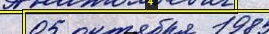

Detected text tesseract: он биниинниний

А 292


Detected text easyOCR: ['95', '2 46₽', '747']

NER results: [{'entity': 'LABEL_1', 'score': 0.63855976, 'index': 1, 'word': 'он', 'start': 0, 'end': 2}, {'entity': 'LABEL_1', 'score': 0.74254656, 'index': 2, 'word': 'бин', 'start': 3, 'end': 6}, {'entity': 'LABEL_1', 'score': 0.587381, 'index': 3, 'word': '##ии', 'start': 6, 'end': 8}, {'entity': 'LABEL_1', 'score': 0.61525923, 'index': 4, 'word': '##н', 'start': 8, 'end': 9}, {'entity': 'LABEL_1', 'score': 0.6553545, 'index': 5, 'word': '##нин', 'start': 9, 'end': 12}, {'entity': 'LABEL_1', 'score': 0.56823456, 'index': 6, 'word': '##ий', 'start': 12, 'end': 14}, {'entity': 'LABEL_1', 'score': 0.58326143, 'index': 7, 'word': 'А', 'start': 16, 'end': 17}, {'entity': 'LABEL_0', 'score': 0.5031419, 'index': 8, 'word': '292', 'start': 18, 'end': 21}]
Entity: 747, Score: 0.5377312302589417
Entity: 46₽, Score: 0.5308012366294861
Entity: 2, Score: 0.5241033434867859


Detected text tesseract: 

Detected text easyOCR: ['92>0']

NER results: []
Entity: 0, Score: 0.7322843670845032
Entity: 92, Score: 0.5779546499252319
Entity: >, Score: 0.5406109094619751


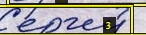

Detected text tesseract:  

 

 

 


Detected text easyOCR: ['22е']

NER results: []
Entity: 22, Score: 0.5921801328659058
Entity: ##е, Score: 0.5254073739051819


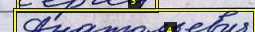

Detected text tesseract:   


Detected text easyOCR: ['02', ' ;', '  ;']

NER results: []
Entity: ;, Score: 0.6480485796928406
Entity: ;, Score: 0.6108739376068115
Entity: 02, Score: 0.5058097243309021


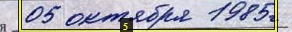

Detected text tesseract: 

Detected text easyOCR: ['04 24*22', '72Р51']

NER results: []
Entity: ##51, Score: 0.6872521042823792
Entity: 24, Score: 0.6835354566574097
Entity: ##Р, Score: 0.6718653440475464


In [35]:
for i, block in enumerate(detected_blocks):
    x1, y1, x2, y2, confidence, class_id = block
    x1, y1, x2, y2 = map(int, [x1, y1, x2, y2])

    cropped_img = image.crop((x1, y1, x2, y2))

    display(cropped_img)

    text = pytesseract.image_to_string(cropped_img, lang='rus')

    cropped_img_np = np.array(cropped_img)
    result_easy = reader.readtext(cropped_img_np, detail=0)

    ner_results_tesseract = nlp(text)

    text_easy = ' '.join(result_easy)
    ner_results_easy = nlp(text_easy)

    print(f'Detected text tesseract: {text}')
    print(f'\nDetected text easyOCR: {result_easy}')
    print(f'\nNER results: {ner_results_tesseract}')
    #print(f'\nNER results: {ner_results_easy}')
    top_n = 3
    sorted_results_easy = sorted(ner_results_easy, key=lambda x: x['score'], reverse=True)[:top_n]


    for result in sorted_results_easy:
      print(f'Entity: {result["word"]}, Score: {result["score"]}')